#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

#Load data

In [ ]:
data = pd.read_csv("/content/3.12. Example.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


##30 customers were told to rate their satisfaction from 1 to 10 based on their shopping experirence which makes satisfaction a discrete type of data and has integer values from 1 to 10.
##brand loyalty however has no widely accepted technique to measure it but there are proxies like churn rate, retention rate, or customer lifetime value(CLV), however in our example we took purchases for 1 year and other factors it ranges from -2 to 2.

#Plot data

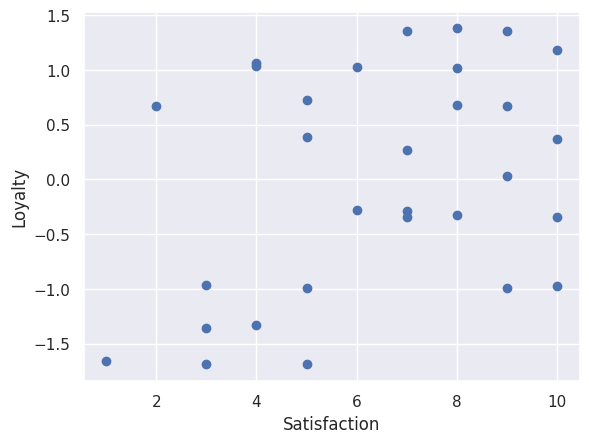

In [ ]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##Here we can see 2 clusters but doesnt give a proper meaning the left bottom cluster can say low satisfied with less loyalty but the right top is scattered all over

#Select the features

In [ ]:
x=data.copy()

#Clustering

In [ ]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

#Clustering Results

In [ ]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


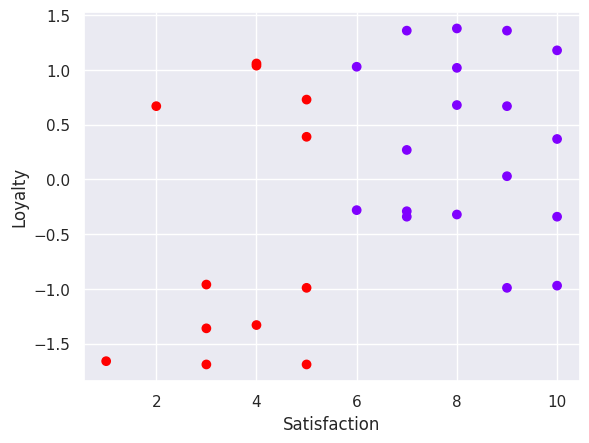

In [ ]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##We can notice everything to left of satisfaction 6 is a seperate cluster and rightsize is a seperate one, which means the kmeans algorithm has considered only satisfaction as important feature why? coz satisfaction has higher values in its range, satisfaction and loyalty has equal importance in market segmentation to fix this we must standardize satisfaction
##most of the times clusters look like its seperated by a vertical or horizontal straight line thats when we can identify something is wrong

#Standardize variables

In [ ]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x) #scale method from preprocessing of sklearn is used to standardize
#scale standardizes with mean 0 and standard deviation of 1 by default
#it scales each variable(column) seperately

In [ ]:
x_scaled
#we get standardized satisfaction values and same values of loyalty as loyalty was already standardized

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#Take advantage of elbow method

In [ ]:
wcss = []
for i in range(1,10):     #1 to 9 clusters
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)
wcss

[59.999999999999986,
 30.352360588087745,
 17.913349527387968,
 11.0914950644991,
 7.792695153937187,
 6.781726493883264,
 6.039178333230177,
 4.954391059301123,
 4.811725392282752]

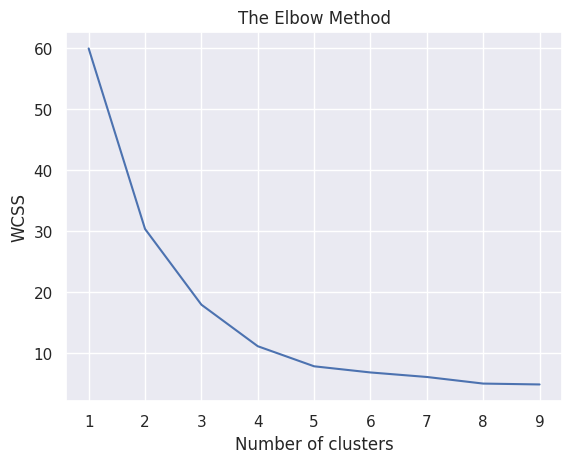

In [ ]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## we can see tips as 2,3,4 and 5 the major limitation of elbow method is we dont know which is the best one among them

##lets try 2

In [ ]:
kmeans_new = KMeans(2) #everytime we run we'll get different results so use
#kmeans_new = KMeans(n_clusters = 2, random_state = 42)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


##here the data frame has original satisfaction and loyalty values but the cluster_pred contains the predicted solutions based on the standardized data

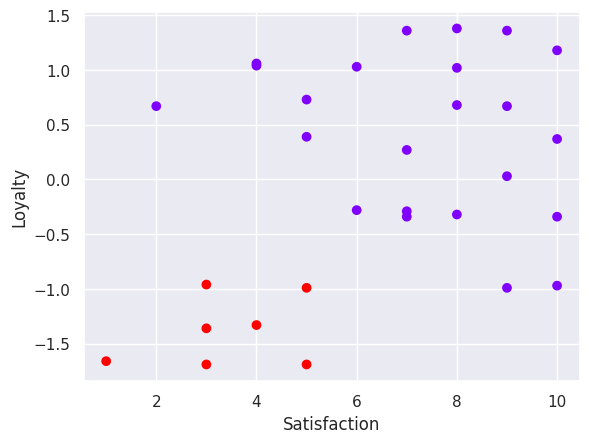

In [ ]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##Here we have taken the original satisfaction in x axis and not the standardized satisfaction as keeping the original helps in easier interpretability while the colors of the data points correspond to cluster_pred values

##the 2 clusters the red one we can call alienated as they are dissatisfied and low loyalty customers and the blue one has everything else since its not very clear lets try with 3 clusters now

##Lets try 3

In [ ]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


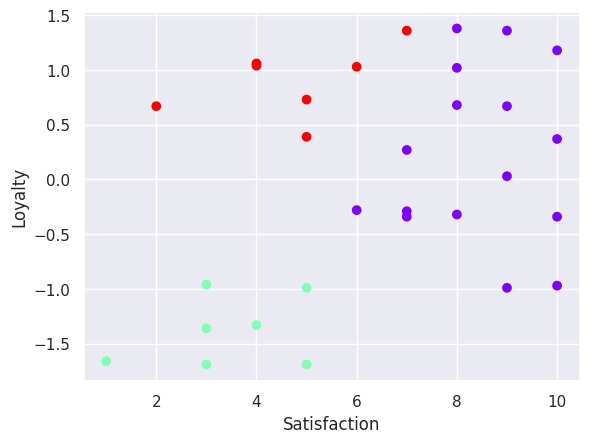

In [ ]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##green is alienated, red is supporters and blue is mixed
##Lets try 4

In [ ]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


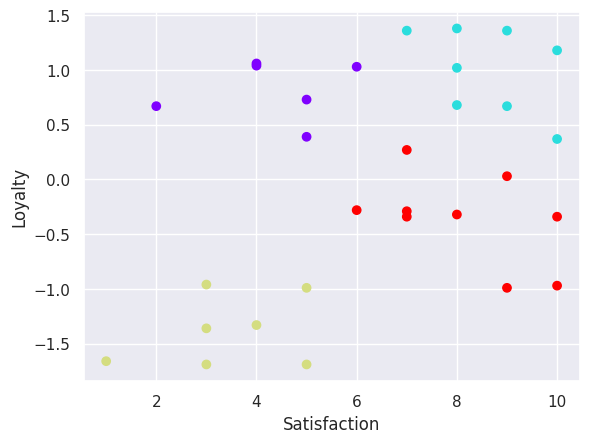

In [ ]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##yellow is alienated, purple is supporters, blue is fans and red is roamers(satisfied but not loyal) this solutions looks to be the best one
## Lets try 5

In [ ]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,3
8,8,1.02,4
9,8,0.68,4


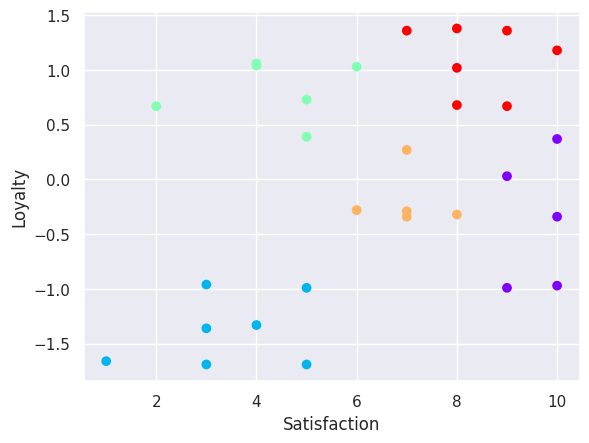

In [ ]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##Here roamers are segmented into less satisfied and satisfied
##if we keep increasing number of clusters segmentation keeps happening
##For instance lets try 9



In [ ]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,5
6,10,-0.97,8
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2


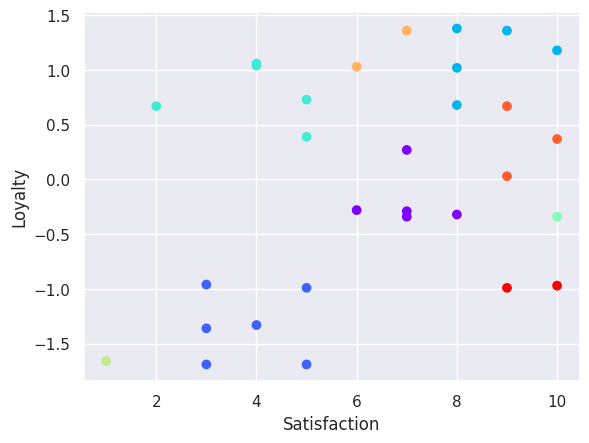

In [ ]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

##here we are not able to analyze insights